# Import Libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Load Data

In [91]:
calories = pd.read_csv("calories.csv",sep=",")
exercise  = pd.read_csv("exercise.csv",sep=",")

df = pd.concat([exercise,calories['Calories']], axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# Data Cleaning, Information & Visualization

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [93]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [94]:
df.shape

(15000, 9)

In [95]:
df.size

135000

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [97]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [98]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [99]:
df['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

# Standard Scaling the Data

In [100]:
x = df.drop('Calories', axis=1).values
y = df['Calories'].values


# Train & Test Splitting the Data

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Function to Measure Performance

# Linear Regression

In [102]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred_lr = model_lr.predict(x_test)

In [113]:
r_squared1 = model_lr.score(x_test, y_test)
rmse1 = mean_squared_error(y_test, y_pred_lr, squared=False)
print("R^2: {}".format(r_squared1))
print("MSE: {}".format(rmse1))

R^2: 0.9656047846568246
MSE: 11.751414388583902


# KNN as Regressor

In [118]:
error = []

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [119]:
r_squared2 = r2_score(y_test, y_pred_knn)
mse2 = mean_squared_error(y_test, y_pred_knn)
print(f'R^2: {r_squared2}')
print(f'MSE: {mse2}')

R^2: -0.3276736384243395
MSE: 5330.569148148148


In [120]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [121]:
print(model_knn.score(x_test, y_test))

0.006666666666666667


# Comparison

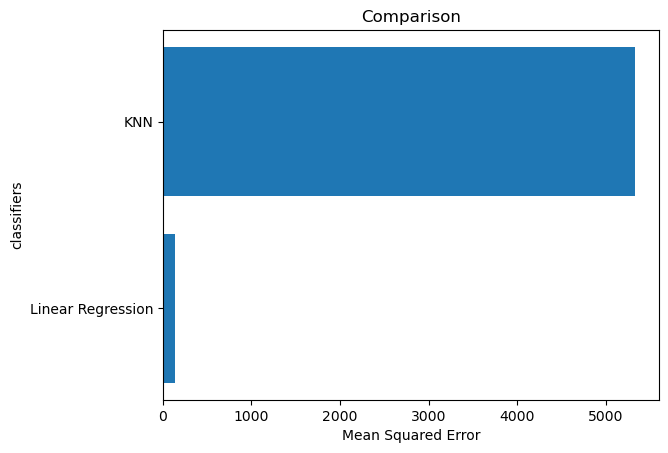

In [145]:
pred=[y_pred_lr,y_pred_knn]
acc=[]
classifiers=["Linear Regression","KNN"]
for i in pred:
    temp= mean_squared_error(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Mean Squared Error')
plt.title('Comparison')
plt.show()

    

In [139]:
linear_regressor = LinearRegression()
linear_scores_kfold = cross_val_score(linear_regressor, x, y, scoring='neg_mean_squared_error', cv=5)
linear_mse_scores_kfold = -linear_scores_kfold

print(f'Linear Regression Cross-validated MSE (K-Fold): {linear_mse_scores_kfold}')
# print(f'Linear Regression Mean MSE (K-Fold): {np.mean(linear_mse_scores_kfold)}')
# print(f'Linear Regression Standard Deviation MSE (K-Fold): {np.std(linear_mse_scores_kfold)}')

Linear Regression Cross-validated MSE (K-Fold): [129.32837213 124.08436845 125.92918675 127.0931384  133.97734347]


In [140]:
# KNN Regression with K-fold cross-validation (K=5)
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_scores_kfold = cross_val_score(knn_regressor, x, y, scoring='neg_mean_squared_error', cv=5)
knn_mse_scores_kfold = -knn_scores_kfold

print(f'KNN Regression Cross-validated MSE (K-Fold): {knn_mse_scores_kfold}')
# print(f'KNN Regression Mean MSE (K-Fold): {np.mean(knn_mse_scores_kfold)}')
# print(f'KNN Regression Standard Deviation MSE (K-Fold): {np.std(knn_mse_scores_kfold)}')

KNN Regression Cross-validated MSE (K-Fold): [5248.96114815 4977.65003704 5163.52255556 5313.05366667 5297.91088889]


In [141]:
# Linear Regression with train/test split (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
linear_regressor.fit(x_train, y_train)
y_pred_linear_val = linear_regressor.predict(x_val)
mse_linear_val = mean_squared_error(y_val, y_pred_linear_val)

print(f'Linear Regression MSE (Train/Test Split): {mse_linear_val}')

Linear Regression MSE (Train/Test Split): 132.0675823406665


In [142]:
# KNN Regression with train/test split (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
knn_regressor.fit(x_train, y_train)
y_pred_knn_val = knn_regressor.predict(x_val)
mse_knn_val = mean_squared_error(y_val, y_pred_knn_val)

print(f'KNN Regression MSE (Train/Test Split): {mse_knn_val}')

KNN Regression MSE (Train/Test Split): 5516.787444444445


In [158]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_probs = logreg.predict_proba(x_test)[:, 8]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label='Gender')

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

D:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:823: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable